# Проект 4. "Авиарейсы без потерь"

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Первичный осмотр данных

In [2]:
df = pd.read_csv('flights.csv')

In [3]:
df.head()

,flight_id,flight_no,departure_airport,arrival_airport,arrival_city,actual_departure,actual_arrival,flight_time,model,aircraft_code,...,total_seats,flight_id-2,sold_tickets_economy,sold_tickets_comfort,sold_tickets_bisiness,sold_tickets_total,revenue_economy,revenue_comfort,revenue_bisiness,revenue_total
0,136119,PG0252,AAQ,SVO,Moscow,2017-01-03 10:08:00+00,2017-01-03 11:49:00+00,101,Boeing 737-300,733,...,130,136119.0,102.0,0.0,11.0,113.0,1250400.0,NaN,402600.0,1653000.0
1,136120,PG0252,AAQ,SVO,Moscow,2017-02-24 10:07:00+00,2017-02-24 11:46:00+00,99,Boeing 737-300,733,...,130,136120.0,98.0,0.0,11.0,109.0,1202800.0,NaN,402600.0,1605400.0
2,136122,PG0252,AAQ,SVO,Moscow,2017-01-08 10:08:00+00,2017-01-08 11:48:00+00,100,Boeing 737-300,733,...,130,136122.0,87.0,0.0,10.0,97.0,1065000.0,NaN,366000.0,1431000.0
3,136130,PG0252,AAQ,SVO,Moscow,2017-02-13 10:07:00+00,2017-02-13 11:46:00+00,99,Boeing 737-300,733,...,130,136130.0,97.0,0.0,10.0,107.0,1190600.0,NaN,366000.0,1556600.0
4,136131,PG0252,AAQ,SVO,Moscow,2017-01-28 10:07:00+00,2017-01-28 11:46:00+00,99,Boeing 737-300,733,...,130,136131.0,112.0,0.0,12.0,124.0,1373600.0,NaN,439200.0,1812800.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   flight_id              127 non-null    int64  
 1   flight_no              127 non-null    object 
 2   departure_airport      127 non-null    object 
 3   arrival_airport        127 non-null    object 
 4   arrival_city           127 non-null    object 
 5   actual_departure       127 non-null    object 
 6   actual_arrival         127 non-null    object 
 7   flight_time            127 non-null    int64  
 8   model                  127 non-null    object 
 9   aircraft_code          127 non-null    object 
 10  economy_seats          127 non-null    int64  
 11  comfort_seats          127 non-null    int64  
 12  bisiness_seats         127 non-null    int64  
 13  total_seats            127 non-null    int64  
 14  flight_id-2            118 non-null    float64
 15  sold_t

Очистка и подготовка данных

In [5]:
# информация о местах комфорт класса отсутствует, поэтому удалим столбцы, относящиеся к ним
df.drop('revenue_comfort', axis=1, inplace=True)
df.drop('comfort_seats', axis=1, inplace=True)
df.drop('sold_tickets_comfort', axis=1, inplace=True)

In [6]:
# столбец flight_id-2 удалим как дублирующий значения в столбце flight_id
df.drop('flight_id-2', axis=1, inplace=True)

In [7]:
df.dropna(inplace=True) #удалим рейсы, по которым нет купленных билетов

In [8]:
df.describe()

,flight_id,flight_time,economy_seats,bisiness_seats,total_seats,sold_tickets_economy,sold_tickets_bisiness,sold_tickets_total,revenue_economy,revenue_bisiness,revenue_total
count,118.000000,118.000000,118.000000,118.0,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,136533.440678,74.957627,101.500000,12.0,113.500000,90.864407,10.788136,101.652542,8.796102e+05,296895.762712,1.176506e+06
std,261.971994,24.992783,16.570363,0.0,16.570363,14.028003,1.395057,14.295643,3.877180e+05,96815.426116,4.794251e+05
min,136119.000000,49.000000,85.000000,12.0,97.000000,54.000000,6.000000,64.000000,3.420000e+05,113400.000000,5.310000e+05
25%,136286.250000,50.000000,85.000000,12.0,97.000000,83.000000,10.000000,95.000000,5.259000e+05,226800.000000,7.464000e+05
50%,136528.500000,74.500000,101.500000,12.0,113.500000,85.500000,11.000000,97.000000,7.956500e+05,226800.000000,1.081650e+06
75%,136768.500000,100.000000,118.000000,12.0,130.000000,101.750000,12.000000,111.750000,1.246750e+06,402600.000000,1.625850e+06
max,136956.000000,103.000000,118.000000,12.0,130.000000,118.000000,12.000000,130.000000,1.446800e+06,439200.000000,1.886000e+06


In [9]:
# Можно сразу отметить, что во всех рассматриваемых в дата сете самолетах стандартное число мест бизнес-класса: 12

In [10]:
# Преобразуем для удобства форматы

df.actual_departure = pd.to_datetime(df.actual_departure) # время отлета - во временной формат
df.actual_arrival = pd.to_datetime(df.actual_arrival) # время прилета - во временной формат

# все остальные числовые данные сделаем целочисленными
df.flight_id = df.flight_id.astype('int64')
df.flight_time = df.flight_time.astype('int64')
df.economy_seats = df.economy_seats.astype('int64')
df.bisiness_seats = df.bisiness_seats.astype('int64')
df.total_seats = df.total_seats.astype('int64')
df.sold_tickets_economy = df.sold_tickets_economy.astype('int64')
df.sold_tickets_bisiness = df.sold_tickets_bisiness.astype('int64')
df.sold_tickets_total = df.sold_tickets_total.astype('int64')
df.revenue_economy = df.revenue_economy.astype('int64')
df.revenue_bisiness = df.revenue_bisiness.astype('int64')
df.revenue_total = df.revenue_total.astype('int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   flight_id              118 non-null    int64              
 1   flight_no              118 non-null    object             
 2   departure_airport      118 non-null    object             
 3   arrival_airport        118 non-null    object             
 4   arrival_city           118 non-null    object             
 5   actual_departure       118 non-null    datetime64[ns, UTC]
 6   actual_arrival         118 non-null    datetime64[ns, UTC]
 7   flight_time            118 non-null    int64              
 8   model                  118 non-null    object             
 9   aircraft_code          118 non-null    object             
 10  economy_seats          118 non-null    int64              
 11  bisiness_seats         118 non-null    int64              

Для определения прибыльности/убыточности рейсов в датасете не хватает данных о расходах на перелет.
Есть только данные о полученной выручке (revenue).
В действительности, расходы у авиакомпаний могут сильно различаться с учетом эффекта масштаба операционной деятельности, стоимости лизинга самолетов (а у большинства авиакомпаний самолеты находятся именно в лизинге) и прочих факторов.
В данном кейсе ограничимся расходами на топливо и прочими условно переменными расходами.
По различным источникам доля расходов на топливо у авиакомпаний может варьироваться от 13% до 30% в зависимости от цены на топливо и прочих влияющих факторов.
Чтобы не ограничиваться только расходами на топливо, примем их долю в расходах за 15%.
Данные о стоимости авиационного топлива в течение зимнего периода 2017 года в Анапе возьмем из официальных источников:
https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/

Создание дополнительных признаков для проведения анализа прибыльности/убыточности авиарейсов

In [12]:
df.flight_time = df.flight_time / 60 # время полета переведем из минут в часы

In [13]:
# Создаем дополнительный столбец с ценами на авиатопливо (в руб/кг без НДС)

# Цены в рублях на авиатопливо в Анапе (1 тн без НДС) согласно официальных источников:
# 41 435 - январь 2017
# 45 510 - ноябрь 2017
# 47 101 - декабрь 2017

df['fuel_price'] = df['actual_departure'].apply(lambda x: 41.435 if x.month == 1 else 45.510 if x.month == 11 else 47.101)

In [14]:
# Создаем столбец с расходами на топливо 
# Количество потребляемого топлива за один час перелета самолетов из дата сета определяем как:
# Boeing 737-300 — 2400 kg/h
# Sukhoi Superjet 100 — 1700 kg/h
# Источник: https://www.airliners.net/forum/viewtopic.php?t=1355819
# Умножаем время перелета в часах на количество потребляемого топлива и его цену в рублях без НДС

df['fuel_consumption_per_km'] = df.model.apply(lambda x: 2400 if x == 'Boeing 737-300' else 1700)
df['fuel_cost'] = df.fuel_consumption_per_km * df.fuel_price * df.flight_time

In [15]:
df

,flight_id,flight_no,departure_airport,arrival_airport,arrival_city,actual_departure,actual_arrival,flight_time,model,aircraft_code,...,total_seats,sold_tickets_economy,sold_tickets_bisiness,sold_tickets_total,revenue_economy,revenue_bisiness,revenue_total,fuel_price,fuel_consumption_per_km,fuel_cost
0,136119,PG0252,AAQ,SVO,Moscow,2017-01-03 10:08:00+00:00,2017-01-03 11:49:00+00:00,1.683333,Boeing 737-300,733,...,130,102,11,113,1250400,402600,1653000,41.435,2400,167397.400000
1,136120,PG0252,AAQ,SVO,Moscow,2017-02-24 10:07:00+00:00,2017-02-24 11:46:00+00:00,1.650000,Boeing 737-300,733,...,130,98,11,109,1202800,402600,1605400,47.101,2400,186519.960000
2,136122,PG0252,AAQ,SVO,Moscow,2017-01-08 10:08:00+00:00,2017-01-08 11:48:00+00:00,1.666667,Boeing 737-300,733,...,130,87,10,97,1065000,366000,1431000,41.435,2400,165740.000000
3,136130,PG0252,AAQ,SVO,Moscow,2017-02-13 10:07:00+00:00,2017-02-13 11:46:00+00:00,1.650000,Boeing 737-300,733,...,130,97,10,107,1190600,366000,1556600,47.101,2400,186519.960000
4,136131,PG0252,AAQ,SVO,Moscow,2017-01-28 10:07:00+00:00,2017-01-28 11:46:00+00:00,1.650000,Boeing 737-300,733,...,130,112,12,124,1373600,439200,1812800,41.435,2400,164082.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,136936,PG0480,AAQ,EGO,Belgorod,2017-01-02 09:28:00+00:00,2017-01-02 10:18:00+00:00,0.833333,Sukhoi Superjet-100,SU9,...,97,73,9,82,462300,170100,632400,41.435,1700,58699.583333
114,136937,PG0480,AAQ,EGO,Belgorod,2017-01-03 09:29:00+00:00,2017-01-03 10:19:00+00:00,0.833333,Sukhoi Superjet-100,SU9,...,97,72,9,81,456000,170100,626100,41.435,1700,58699.583333
115,136951,PG0480,AAQ,EGO,Belgorod,2017-02-02 09:28:00+00:00,2017-02-02 10:17:00+00:00,0.816667,Sukhoi Superjet-100,SU9,...,97,78,12,90,493800,226800,720600,47.101,1700,65391.888333
116,136953,PG0480,AAQ,EGO,Belgorod,2017-02-27 09:27:00+00:00,2017-02-27 10:17:00+00:00,0.833333,Sukhoi Superjet-100,SU9,...,97,85,12,97,538500,226800,765300,47.101,1700,66726.416667


In [28]:
# Суммарные расходы

df['total_costs'] = df.fuel_cost/0.15 # допущение, что доля расходов на топливо составляет 15% в составе общих расходов на полет

#  Прибыль / убыток 
# Указанная цена в билетах включает себя НДС, цены на топливо даны без учета НДС
# Прибыль по бухгалтерской форме 2 расчитывается без НДС (18%)

df['income'] = (df.revenue_total/1.18 - df.total_costs)

In [29]:
df.income = df.income.astype('int64')


In [30]:
df

,flight_id,flight_no,departure_airport,arrival_airport,arrival_city,actual_departure,actual_arrival,flight_time,model,aircraft_code,...,revenue_economy,revenue_bisiness,revenue_total,fuel_price,fuel_consumption_per_km,fuel_cost,total_costs,income,return_rate,loading
0,136119,PG0252,AAQ,SVO,Moscow,2017-01-03 10:08:00+00:00,2017-01-03 11:49:00+00:00,1.683333,Boeing 737-300,733,...,1250400,402600,1653000,41.435,2400,167397.400000,1.115983e+06,284864,0.253,0.869
1,136120,PG0252,AAQ,SVO,Moscow,2017-02-24 10:07:00+00:00,2017-02-24 11:46:00+00:00,1.650000,Boeing 737-300,733,...,1202800,402600,1605400,47.101,2400,186519.960000,1.243466e+06,117042,0.143,0.838
2,136122,PG0252,AAQ,SVO,Moscow,2017-01-08 10:08:00+00:00,2017-01-08 11:48:00+00:00,1.666667,Boeing 737-300,733,...,1065000,366000,1431000,41.435,2400,165740.000000,1.104933e+06,107778,0.146,0.746
3,136130,PG0252,AAQ,SVO,Moscow,2017-02-13 10:07:00+00:00,2017-02-13 11:46:00+00:00,1.650000,Boeing 737-300,733,...,1190600,366000,1556600,47.101,2400,186519.960000,1.243466e+06,75686,0.116,0.823
4,136131,PG0252,AAQ,SVO,Moscow,2017-01-28 10:07:00+00:00,2017-01-28 11:46:00+00:00,1.650000,Boeing 737-300,733,...,1373600,439200,1812800,41.435,2400,164082.600000,1.093884e+06,442387,0.332,0.954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,136936,PG0480,AAQ,EGO,Belgorod,2017-01-02 09:28:00+00:00,2017-01-02 10:18:00+00:00,0.833333,Sukhoi Superjet-100,SU9,...,462300,170100,632400,41.435,1700,58699.583333,3.913306e+05,144601,0.315,0.845
114,136937,PG0480,AAQ,EGO,Belgorod,2017-01-03 09:29:00+00:00,2017-01-03 10:19:00+00:00,0.833333,Sukhoi Superjet-100,SU9,...,456000,170100,626100,41.435,1700,58699.583333,3.913306e+05,139262,0.309,0.835
115,136951,PG0480,AAQ,EGO,Belgorod,2017-02-02 09:28:00+00:00,2017-02-02 10:17:00+00:00,0.816667,Sukhoi Superjet-100,SU9,...,493800,226800,720600,47.101,1700,65391.888333,4.359459e+05,174732,0.331,0.928
116,136953,PG0480,AAQ,EGO,Belgorod,2017-02-27 09:27:00+00:00,2017-02-27 10:17:00+00:00,0.833333,Sukhoi Superjet-100,SU9,...,538500,226800,765300,47.101,1700,66726.416667,4.448428e+05,203716,0.357,1.000


In [31]:
print(f'Доля убыточных рейсов составляет {round(df[df.income < 0].shape[0] / df.shape[0] * 100, 2)} процентов')

Доля убыточных рейсов составляет 2.54 процентов


Теперь расчитаем доходность всех рейсов как отношение полученной прибыли к выручке от проданных билетов (без НДС)

In [67]:
df['return_rate'] = df.income / (df.revenue_total/1.18) *100

<AxesSubplot:>

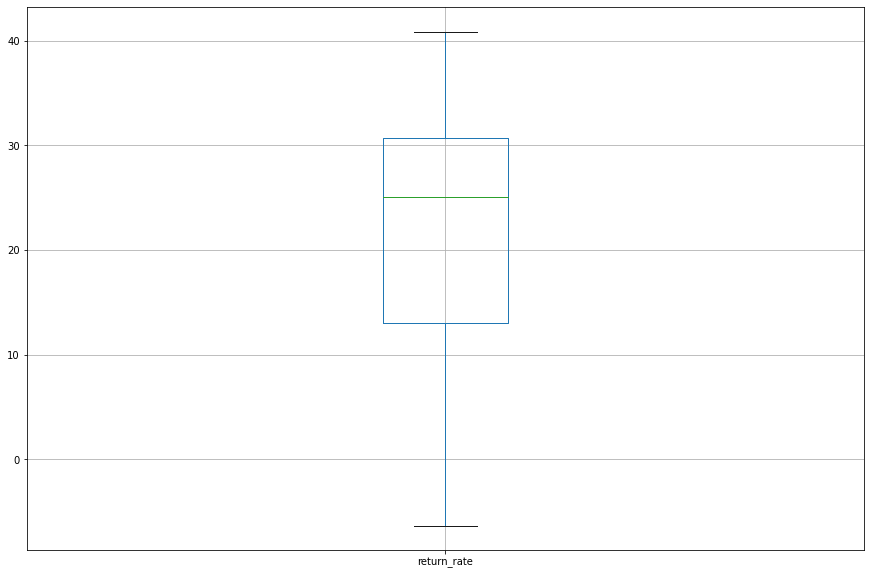

In [68]:
df[['return_rate']].boxplot()

Значение доходности рейсов из второго и третьего квартилей лежат в диапазоне между 13% и 30%. Выбросы снизу достигают -6%, 
а сверзу +41%. Среднее значение доходности: +22,5%

In [69]:
# Добавим еще один новый признак - загрузку самолета, расчитанную как отношение купленных билетов к общему числу кресел

df['loading'] = round(df.sold_tickets_total / df.total_seats, 3)

In [70]:
df.describe()

,flight_id,flight_time,economy_seats,bisiness_seats,total_seats,sold_tickets_economy,sold_tickets_bisiness,sold_tickets_total,revenue_economy,revenue_bisiness,revenue_total,fuel_price,fuel_consumption_per_km,fuel_cost,total_costs,income,return_rate,loading
count,118.000000,118.000000,118.000000,118.0,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000
mean,136533.440678,1.249294,101.500000,12.0,113.500000,90.864407,10.788136,101.652542,8.796102e+05,296895.762712,1.176506e+06,44.123949,2050.000000,119412.450353,7.960830e+05,200955.372881,22.514662,0.899941
std,261.971994,0.416546,16.570363,0.0,16.570363,14.028003,1.395057,14.295643,3.877180e+05,96815.426116,4.794251e+05,2.841401,351.492544,57709.785282,3.847319e+05,112250.071055,11.674480,0.081740
min,136119.000000,0.816667,85.000000,12.0,97.000000,54.000000,6.000000,64.000000,3.420000e+05,113400.000000,5.310000e+05,41.435000,1700.000000,57525.591667,3.835039e+05,-75536.000000,-6.331331,0.660000
25%,136286.250000,0.833333,85.000000,12.0,97.000000,83.000000,10.000000,95.000000,5.259000e+05,226800.000000,7.464000e+05,41.435000,1700.000000,59873.575000,3.991572e+05,137429.000000,13.005846,0.835000
50%,136528.500000,1.241667,101.500000,12.0,113.500000,85.500000,11.000000,97.000000,7.956500e+05,226800.000000,1.081650e+06,41.435000,2050.000000,115243.072500,7.682871e+05,194819.000000,25.107268,0.898500
75%,136768.500000,1.666667,118.000000,12.0,130.000000,101.750000,12.000000,111.750000,1.246750e+06,402600.000000,1.625850e+06,47.101000,2400.000000,169054.800000,1.127032e+06,251889.000000,30.735485,0.990000
max,136956.000000,1.716667,118.000000,12.0,130.000000,118.000000,12.000000,130.000000,1.446800e+06,439200.000000,1.886000e+06,47.101000,2400.000000,190288.040000,1.268587e+06,493371.000000,40.868274,1.000000


Посмотрим на возможную корреляцию признаков

<AxesSubplot:>

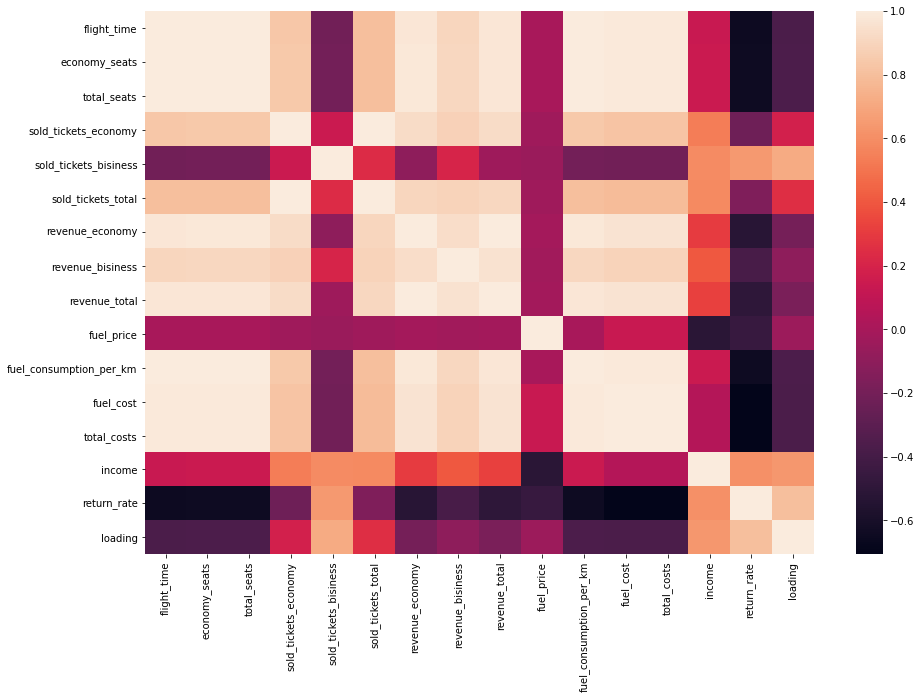

In [71]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df.drop(['bisiness_seats', 'flight_id'], axis=1).corr(),)
# sns.heatmap(df.corr(),)

In [72]:
round(df.drop(['bisiness_seats', 'flight_id'], axis=1).corr(), 2)

,flight_time,economy_seats,total_seats,sold_tickets_economy,sold_tickets_bisiness,sold_tickets_total,revenue_economy,revenue_bisiness,revenue_total,fuel_price,fuel_consumption_per_km,fuel_cost,total_costs,income,return_rate,loading
flight_time,1.00,1.00,1.00,0.84,-0.21,0.80,0.98,0.91,0.97,0.00,1.00,0.99,0.99,0.14,-0.65,-0.37
economy_seats,1.00,1.00,1.00,0.84,-0.20,0.81,0.98,0.91,0.98,0.00,1.00,0.99,0.99,0.15,-0.64,-0.37
total_seats,1.00,1.00,1.00,0.84,-0.20,0.81,0.98,0.91,0.98,0.00,1.00,0.99,0.99,0.15,-0.64,-0.37
sold_tickets_economy,0.84,0.84,0.84,1.00,0.14,1.00,0.93,0.88,0.93,-0.03,0.84,0.82,0.82,0.54,-0.22,0.18
sold_tickets_bisiness,-0.21,-0.20,-0.20,0.14,1.00,0.24,-0.10,0.20,-0.04,-0.05,-0.20,-0.21,-0.21,0.59,0.64,0.71
sold_tickets_total,0.80,0.81,0.81,1.00,0.24,1.00,0.90,0.89,0.91,-0.03,0.81,0.79,0.79,0.58,-0.16,0.25
revenue_economy,0.98,0.98,0.98,0.93,-0.10,0.90,1.00,0.93,1.00,-0.01,0.98,0.97,0.97,0.30,-0.52,-0.20
revenue_bisiness,0.91,0.91,0.91,0.88,0.20,0.89,0.93,1.00,0.96,-0.02,0.91,0.89,0.89,0.40,-0.39,-0.10
revenue_total,0.97,0.98,0.98,0.93,-0.04,0.91,1.00,0.96,1.00,-0.01,0.98,0.96,0.96,0.33,-0.50,-0.18
fuel_price,0.00,0.00,0.00,-0.03,-0.05,-0.03,-0.01,-0.02,-0.01,1.00,0.00,0.14,0.14,-0.51,-0.46,-0.05


Обращает на себя внимание заметная корреляция доходности рейса
с показателем загрузки салона (0,8) и количеством проданных билетов бизнес-класса (0,64)

In [ ]:
Теперь рассомтрим более пристально зависимость размера прибыли (income) от загрузки салона.
Сделаем две выборки: более 75% загрузки и менее или равно 75%

In [73]:
# метки 
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

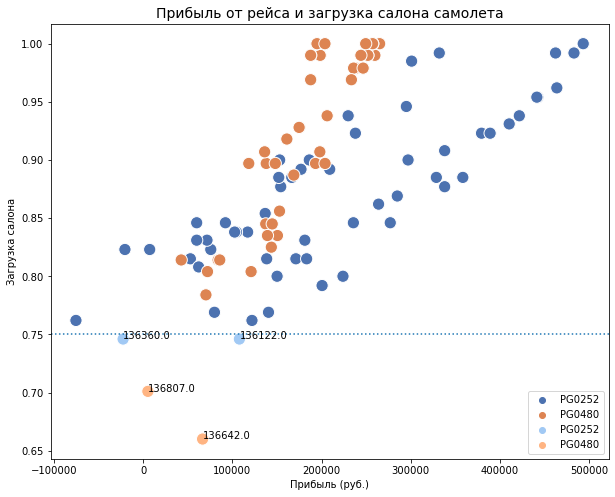

In [76]:
df1 = df[df.loading > 0.75]
df2 = df[df.loading <= 0.75]

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='income', y='loading', data=df1,
                hue='flight_no', s=150, palette="deep")
sns.scatterplot(x='income', y='loading', data=df2,
                hue='flight_no', s=150, palette="pastel")
sns.set_color_codes('pastel')
plt.axhline(0.75, linestyle=':')
ax.legend(loc=4)
ax.set_title(
    'Прибыль от рейса и загрузка салона самолета', fontsize=14)
ax.set_xlabel('Прибыль (руб.)')
ax.set_ylabel('Загрузка салона')

label_point(df2.income,
            df2.loading,
            df2.flight_id,
            plt.gca())


На графике наглядно видно, как рейсы с самой низкой загруженностью салона показывают минимальные значения прибыли 

In [34]:
df[df.loading < 0.75] # выберем рейсы с загрузкой салона менее 75%

,flight_id,flight_no,departure_airport,arrival_airport,arrival_city,actual_departure,actual_arrival,flight_time,model,aircraft_code,...,revenue_economy,revenue_bisiness,revenue_total,fuel_price,fuel_consumption_per_km,fuel_cost,total_costs,income,return_rate,loading
2,136122,PG0252,AAQ,SVO,Moscow,2017-01-08 10:08:00+00:00,2017-01-08 11:48:00+00:00,1.666667,Boeing 737-300,733,...,1065000,366000,1431000,41.435,2400,165740.000000,1.104933e+06,107778,0.089,0.746
38,136360,PG0252,AAQ,SVO,Moscow,2017-02-05 10:08:00+00:00,2017-02-05 11:48:00+00:00,1.666667,Boeing 737-300,733,...,1052800,402600,1455400,47.101,2400,188404.000000,1.256027e+06,-22636,-0.018,0.746
68,136642,PG0480,AAQ,EGO,Belgorod,2017-01-30 09:28:00+00:00,2017-01-30 10:17:00+00:00,0.816667,Sukhoi Superjet-100,SU9,...,342000,189000,531000,41.435,1700,57525.591667,3.835039e+05,66496,0.148,0.660
93,136807,PG0480,AAQ,EGO,Belgorod,2017-02-23 09:28:00+00:00,2017-02-23 10:18:00+00:00,0.833333,Sukhoi Superjet-100,SU9,...,379800,151200,531000,47.101,1700,66726.416667,4.448428e+05,5157,0.011,0.701


Прибыль от рейсов с загрузкой салона менее 75% находится на минимальных значениях

Указанные выше четыре рейса можно предложить для исключения из зимнего расписания полетов. 

Во многих корпорациях определяется минимальная норма рентабельности проектов. Если применить к данному бизнес кейсу такой подход, выбрав меру отсечения в 15%, то под сокращение попадет значительно большее количество рейсов. Но для того, чтобы делать такие рекомендации, нужно иметь более точную информацию о затратах.

Анализ доходности.
Используем тот же подход, который мы применили к значению просто прибыли.
Но в данном случае возьмем полеты с доходностью выше 15% и ниже или равно.

Text(0, 0.5, 'Загрузка салона')

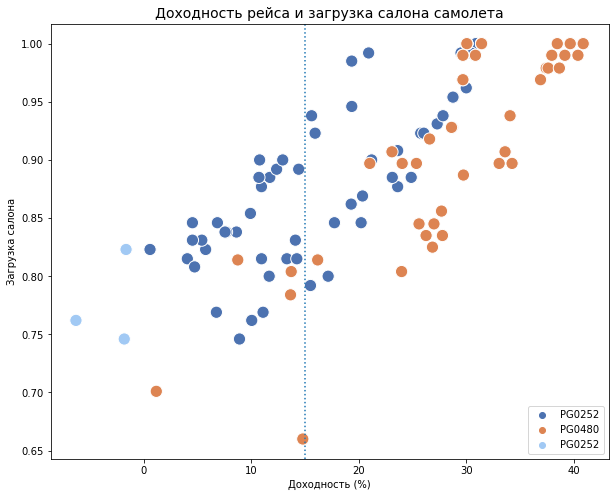

In [81]:
df1 = df[df.return_rate > 0.15]
df2 = df[df.return_rate <= 0.15]

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='return_rate', y='loading', data=df1,
                hue='flight_no', s=150, palette="deep")
sns.scatterplot(x='return_rate', y='loading', data=df2,
                hue='flight_no', s=150, palette="pastel")
sns.set_color_codes('pastel')
plt.axvline(15, linestyle=':')
ax.legend(loc=4)
ax.set_title(
    'Доходность рейса и загрузка салона самолета', fontsize=14)
ax.set_xlabel('Доходность (%)')
ax.set_ylabel('Загрузка салона')



In [80]:
df[df.return_rate < 15] # выберем рейсы с доходностью менее 15%

,flight_id,flight_no,departure_airport,arrival_airport,arrival_city,actual_departure,actual_arrival,flight_time,model,aircraft_code,...,revenue_economy,revenue_bisiness,revenue_total,fuel_price,fuel_consumption_per_km,fuel_cost,total_costs,income,return_rate,loading
1,136120,PG0252,AAQ,SVO,Moscow,2017-02-24 10:07:00+00:00,2017-02-24 11:46:00+00:00,1.650000,Boeing 737-300,733,...,1202800,402600,1605400,47.101,2400,186519.960000,1.243466e+06,117042,8.602813,0.838
2,136122,PG0252,AAQ,SVO,Moscow,2017-01-08 10:08:00+00:00,2017-01-08 11:48:00+00:00,1.666667,Boeing 737-300,733,...,1065000,366000,1431000,41.435,2400,165740.000000,1.104933e+06,107778,8.887354,0.746
3,136130,PG0252,AAQ,SVO,Moscow,2017-02-13 10:07:00+00:00,2017-02-13 11:46:00+00:00,1.650000,Boeing 737-300,733,...,1190600,366000,1556600,47.101,2400,186519.960000,1.243466e+06,75686,5.737471,0.823
5,136132,PG0252,AAQ,SVO,Moscow,2017-02-15 10:09:00+00:00,2017-02-15 11:48:00+00:00,1.650000,Boeing 737-300,733,...,1274800,439200,1714000,47.101,2400,186519.960000,1.243466e+06,209075,14.393728,0.892
6,136135,PG0252,AAQ,SVO,Moscow,2017-02-01 10:08:00+00:00,2017-02-01 11:48:00+00:00,1.666667,Boeing 737-300,733,...,1276000,402600,1678600,47.101,2400,188404.000000,1.256027e+06,166515,11.705451,0.885
7,136146,PG0252,AAQ,SVO,Moscow,2017-02-09 10:08:00+00:00,2017-02-09 11:48:00+00:00,1.666667,Boeing 737-300,733,...,1201600,402600,1604200,47.101,2400,188404.000000,1.256027e+06,103464,7.610492,0.838
10,136165,PG0252,AAQ,SVO,Moscow,2017-02-22 10:11:00+00:00,2017-02-22 11:52:00+00:00,1.683333,Boeing 737-300,733,...,1238200,329400,1567600,47.101,2400,190288.040000,1.268587e+06,59887,4.507952,0.846
12,136178,PG0252,AAQ,SVO,Moscow,2017-01-29 10:10:00+00:00,2017-01-29 11:49:00+00:00,1.650000,Boeing 737-300,733,...,1105200,329400,1434600,41.435,2400,164082.600000,1.093884e+06,121878,10.024818,0.762
14,136185,PG0252,AAQ,SVO,Moscow,2017-01-14 10:06:00+00:00,2017-01-14 11:49:00+00:00,1.716667,Boeing 737-300,733,...,1154000,366000,1520000,41.435,2400,170712.200000,1.138081e+06,150054,11.648929,0.800
15,136202,PG0252,AAQ,SVO,Moscow,2017-01-05 10:07:00+00:00,2017-01-05 11:49:00+00:00,1.700000,Boeing 737-300,733,...,1093000,402600,1495600,41.435,2400,169054.800000,1.127032e+06,140425,11.079266,0.769


Критерий отбора с доходностью выше 15%, как видим, отсекает уже 37 рейсов. Для того, чтобы предлагать его руководству требуется
более детальная проработка расходов, что на практике сводится к разделению общих расходов компании на условно постоянные и условно переменные расходы.